<a href="https://colab.research.google.com/github/Mikaner/reinforcement/blob/main/maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

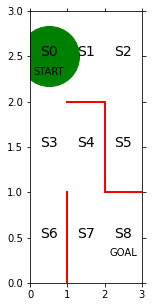

In [ ]:
fig = plt.figure(figsize=(2,5))
ax = plt.gca()

# draw red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0~S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

# draw green circle for S0
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [ ]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7, 列は移動方向で↑，→，↓，←を指す
theta_0 = np.array([[np.nan,      1,      1, np.nan], # S0
                    [np.nan,      1, np.nan,      1], # S1
                    [np.nan, np.nan,      1,      1], # S2
                    [     1,      1,      1, np.nan], # S3
                    [np.nan, np.nan,      1,      1], # S4
                    [     1, np.nan, np.nan, np.nan], # S5
                    [     1, np.nan, np.nan, np.nan], # S6
                    [     1,      1, np.nan, np.nan], # S7 ※S8はゴールなので方策なし
                    ])


In [ ]:
# 方策パラメータthetaを行動方針piに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''
    
    [m, n] = theta.shape
    print(theta.shape)
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        print(pi[i,:])

    pi = np.nan_to_num(pi)

    return pi

In [ ]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

(8, 4)
[nan 0.5 0.5 nan]
[nan 0.5 nan 0.5]
[nan nan 0.5 0.5]
[0.33333333 0.33333333 0.33333333        nan]
[nan nan 0.5 0.5]
[ 1. nan nan nan]
[ 1. nan nan nan]
[0.5 0.5 nan nan]


array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])